In [1]:
import os,sys
sys.path.append('./../../../open_AR_Sandbox/')
sys.path.append('./../../../gempy-1.16/')
import sandbox.sandbox as sb
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import pykinect2

Freenect module not found, KinectV1 will not work.


In [2]:
calib = sb.CalibrationData(file='my_calibration.json')

JSON configuration loaded.


In [3]:
kinect = sb.KinectV2(calib)

KinectV2 initialized.


In [4]:
marker = sb.ArucoMarkers(kinect)

In [5]:
marker.find_markers_ir(kinect,4)

,Corners_IR_y,Corners_IR_x
ids,,
5,391,97
2,119,434
11,117,100
1,391,436


In [6]:
marker.find_markers_rgb(kinect,4)

,Corners_RGB_y,Corners_RGB_x
ids,,
1,1032,1539
11,243,546
5,1040,541
2,235,1514


In [7]:
df=marker.update_dict_markers_current()

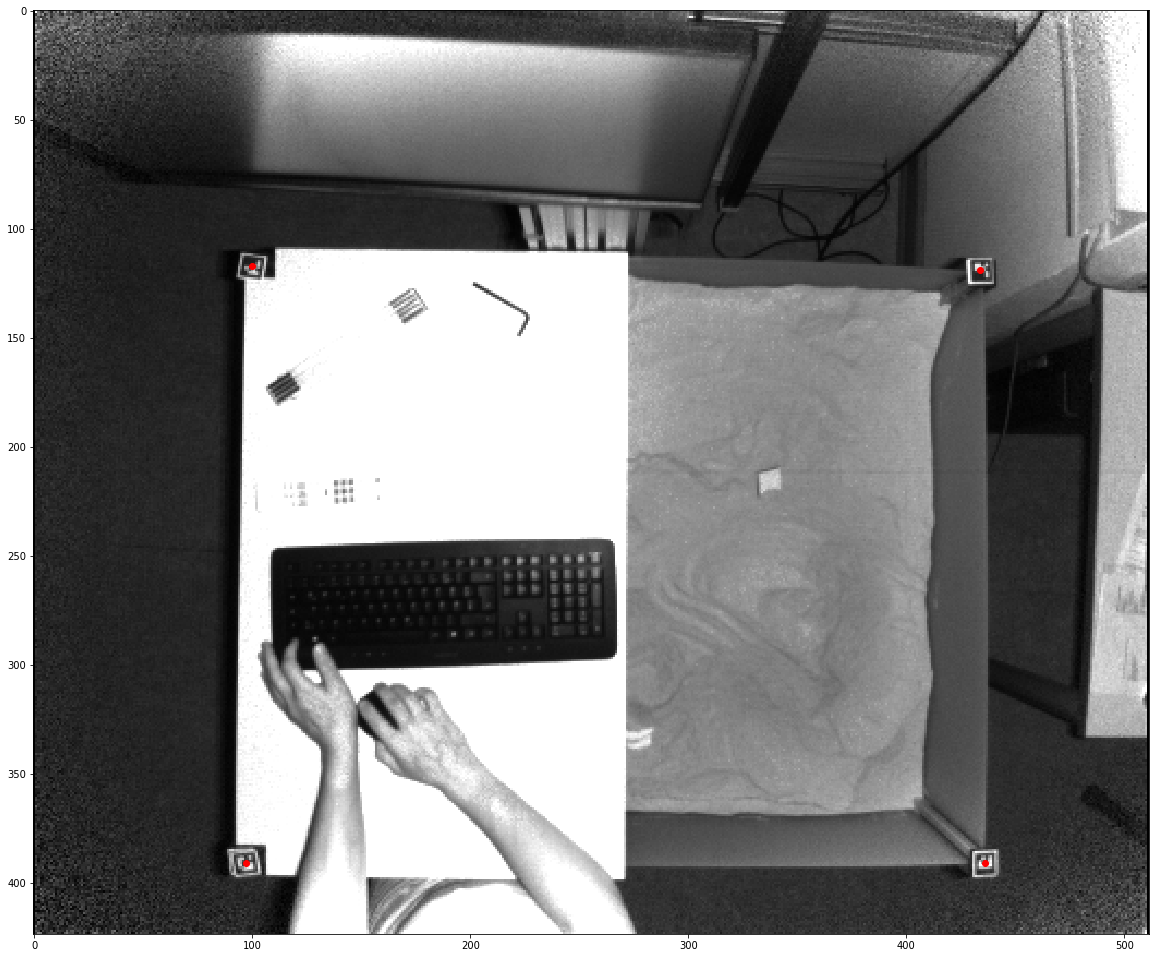

In [8]:
marker.plot_ir_aruco_location(kinect)

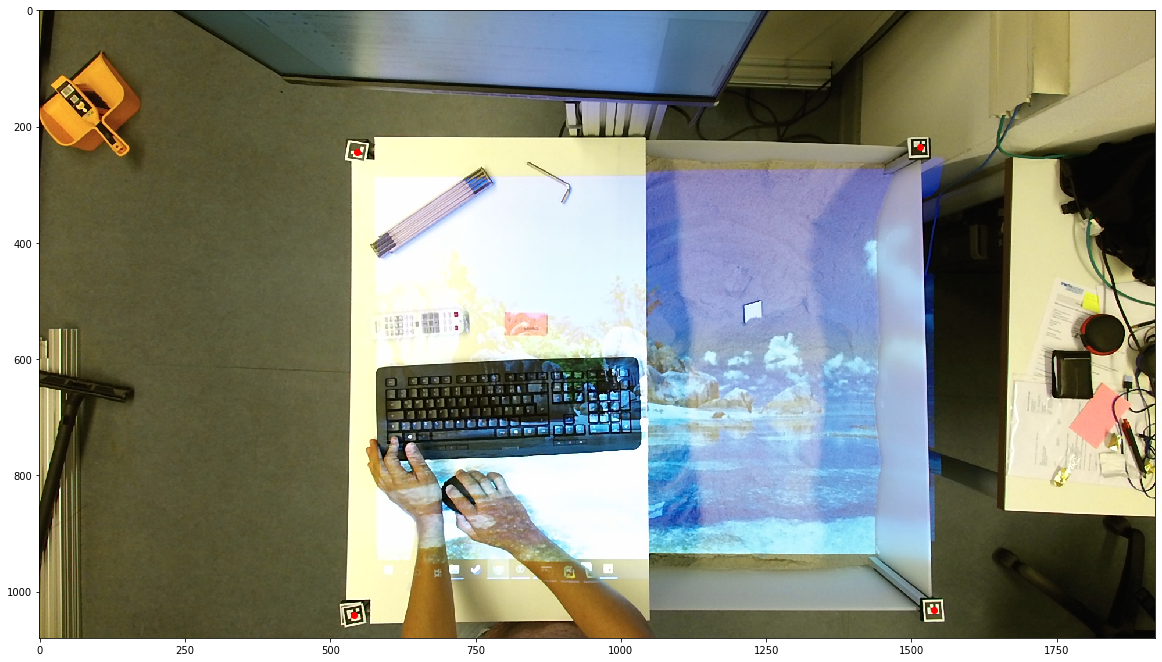

In [9]:
marker.plot_rgb_aruco_location(kinect)

In [11]:
val= marker.update_dict_markers_current()
val

,Corners_IR_y,Corners_IR_x,Corners_RGB_y,Corners_RGB_x
ids,,,,
1,391,436,1032,1539
2,119,434,235,1514
5,391,97,1040,541
11,117,100,243,546


In [12]:
to_x = int(sum(val["Corners_IR_x"])/4)
to_y = int(sum(val["Corners_IR_y"])/4)

In [13]:
depthPoint = pykinect2.PyKinectV2._DepthSpacePoint(to_x,to_y)
depth = kinect.get_frame()[to_x][to_y]
ColorSpacePoint = kinect.device._mapper.MapDepthPointToColorSpace(depthPoint = depthPoint, depth = depth)
est_x=int(ColorSpacePoint.x)
est_y= int(ColorSpacePoint.y)

In [14]:
values = pd.DataFrame({"Corners_IR_x": [est_x], "Corners_IR_y": [est_y]})
values

,Corners_IR_x,Corners_IR_y
0,1026,694


In [15]:
df = pd.DataFrame.append(val, values, sort=False)
df

,Corners_IR_y,Corners_IR_x,Corners_RGB_y,Corners_RGB_x
1,391,436,1032,1539
2,119,434,235,1514
5,391,97,1040,541
11,117,100,243,546
0,694,1026,NaN,NaN


In [16]:
df_temp = pd.DataFrame({"ids":[0],"Corners_IR_x": [to_x], "Corners_IR_y": [to_y], 
                        "Corners_RGB_x": [est_x], "Corners_RGB_y": [est_y]})
theoretical=df_temp.set_index("ids")
val = pd.concat([val, theoretical], sort=False)
final = val.set_index("ids")
final

KeyError: 'ids'

In [ ]:
val

In [17]:
marker.middle_point(autocalib=1)

,Middle_IR_x,Middle_IR_y,Middle_RGB_x,Middle_RGB_y
0,266,254,1026,694
